In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
le = LabelEncoder()
ge = LabelEncoder()
data['GENDER'] = ge.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])

In [7]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [8]:
y = data["LUNG_CANCER"]
x = data.drop(["LUNG_CANCER"],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=20)

Accuracy by logistic Regression:= 94.623656

Classification Report By Logistic Regression Algorithm 

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.94      1.00      0.97        78

    accuracy                           0.95        93
   macro avg       0.97      0.83      0.88        93
weighted avg       0.95      0.95      0.94        93



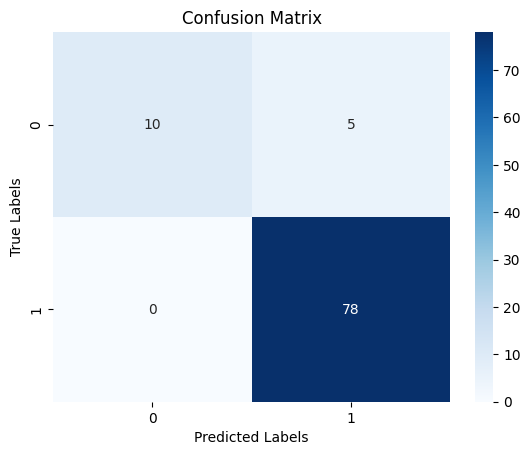

In [11]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,y_pred_lr)*100
print(f"Accuracy by logistic Regression:= {accuracy_lr :2f}\n")
print("Classification Report By Logistic Regression Algorithm \n")
print(classification_report(y_test,y_pred_lr))
cm = confusion_matrix(y_true = y_test, y_pred = y_pred_lr )
#plot_confusion_matrix(cm,level,title = "confusion_matrix")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [12]:
Kclassifier_model = KNeighborsClassifier(n_neighbors = 3)
Kclassifier_model.fit(X_train,y_train)
y_pred_kclassifier = Kclassifier_model.predict(X_test)
accuracy_kclassifier = accuracy_score(y_test,y_pred_kclassifier)*100
print(f"Accuracy by KNN:= {accuracy_kclassifier :2f}\n")
print("Classification Report By KNN Algorithm \n")
print(classification_report(y_test,y_pred_kclassifier))

Accuracy by KNN:= 89.247312

Classification Report By KNN Algorithm 

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.95      0.92      0.94        78

    accuracy                           0.89        93
   macro avg       0.80      0.83      0.81        93
weighted avg       0.90      0.89      0.90        93



In [13]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)
y_pred_NB = NB_model.predict(X_test)
accuracy_NB = accuracy_score(y_test,y_pred_NB)*100
print(f"Accuracy by naive bayes:= {accuracy_NB :2f}\n")
print("Classification Report By Naive bayes Algorithm \n")
print(classification_report(y_test,y_pred_NB))

Accuracy by naive bayes:= 91.397849

Classification Report By Naive bayes Algorithm 

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.93      0.97      0.95        78

    accuracy                           0.91        93
   macro avg       0.87      0.79      0.82        93
weighted avg       0.91      0.91      0.91        93



In [14]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
accuracy_RF = accuracy_score(y_test,y_pred_RF)*100
print(f"Accuracy by Random Forest Classifier:= {accuracy_RF :2f}\n")
print("Classification Report By Random Forest Algorithm \n")
print(classification_report(y_test,y_pred_RF))

Accuracy by Random Forest Classifier:= 89.247312

Classification Report By Random Forest Algorithm 

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.90      0.99      0.94        78

    accuracy                           0.89        93
   macro avg       0.88      0.69      0.74        93
weighted avg       0.89      0.89      0.88        93



In [15]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train,y_train)
y_pred_SVM = SVM_model.predict(X_test)
accuracy_SVM = accuracy_score(y_test,y_pred_SVM)*100
print(f"Accuracy by SVM Classifier:= {accuracy_SVM :2f}\n")
print("Classification Report By SVM Algorithm \n")
print(classification_report(y_test,y_pred_SVM))

Accuracy by SVM Classifier:= 87.096774

Classification Report By SVM Algorithm 

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        15
           1       0.87      1.00      0.93        78

    accuracy                           0.87        93
   macro avg       0.93      0.60      0.63        93
weighted avg       0.89      0.87      0.83        93



In [16]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy',random_state=30)  
classifier.fit(X_train, y_train)  
y_pred_tree = classifier.predict(X_test)
accuracy_tree = accuracy_score(y_test,y_pred_tree)*100
print(f"Accuracy by Decision Tree Classifier:= {accuracy_tree :2f}\n")
print("Classification Report By Decision Tree Algorithm \n")
print(classification_report(y_test,y_pred_tree))

Accuracy by Decision Tree Classifier:= 83.870968

Classification Report By Decision Tree Algorithm 

              precision    recall  f1-score   support

           0       0.50      0.40      0.44        15
           1       0.89      0.92      0.91        78

    accuracy                           0.84        93
   macro avg       0.69      0.66      0.68        93
weighted avg       0.83      0.84      0.83        93



In [17]:
import xgboost as xgb
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)
y_pred_xgb = XGB_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)*100
print(f"Accuracy by XGBoost Algorithm:= {accuracy_xgb :2f}\n")
print("Classification Report By XGBoost Algorithm \n")
print(classification_report(y_test,y_pred_xgb))

Accuracy by XGBoost Algorithm:= 92.473118

Classification Report By XGBoost Algorithm 

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.94      0.97      0.96        78

    accuracy                           0.92        93
   macro avg       0.89      0.82      0.85        93
weighted avg       0.92      0.92      0.92        93



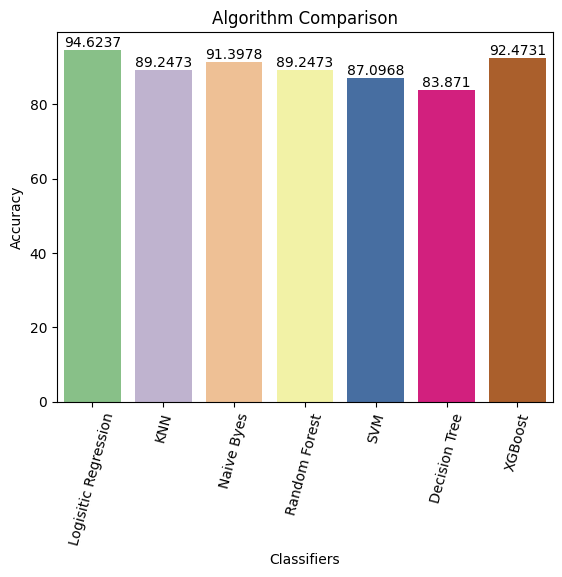

In [27]:
model_name =['Logisitic Regression','KNN','Naive Byes','Random Forest','SVM','Decision Tree','XGBoost']
model_accuracy = [accuracy_lr,accuracy_kclassifier,accuracy_NB,accuracy_RF,accuracy_SVM,accuracy_tree,accuracy_xgb]  
plt.title('Algorithm Comparison')
plt.xticks(rotation=75)
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
ax = sns.barplot(x= model_name, y= model_accuracy,palette="Accent")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()